<a href="https://colab.research.google.com/github/vinceriot/computervision/blob/main/lab6_videoDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Голдобин Денис ФИТ-1-21

Модель YOLO 11 - https://docs.ultralytics.com/models/yolo11/

Для работы с видео OpenCV - https://opencv.org/

**Ссылка на диск с результатом и исходным видео -  https://disk.yandex.ru/d/qzPIyAEPTjMTZA**


In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.4/898.4 kB 20.5 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import cv2

In [9]:
model = YOLO("yolo11x.pt")

100%|██████████| 109M/109M [00:00<00:00, 193MB/s] 


In [1]:
input_video_path = '/content/video_sample.mp4'
output_video_path = 'video_result.mp4'

In [13]:

cap = cv2.VideoCapture(input_video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

mean_confidences = []
category_confidences = defaultdict(list)
total_objects_per_frame = []
frame_count = 0

import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from ultralytics import YOLO
import cv2

# Загрузка модели YOLO
model = YOLO("yolo11x.pt")

# Пути к видео
input_video_path = '/content/video_sample.mp4'
output_video_path = 'video_result.mp4'

# Открытие видео
cap = cv2.VideoCapture(input_video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))


mean_confidences = []
category_confidences = defaultdict(list)
total_objects_per_frame = []
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Детектирование объектов на текущем кадре
    results = model(frame)

    # Извлечение информации о детекциях
    confidences = [box.conf.cpu().item() for box in results[0].boxes] if results[0].boxes else []
    categories = [int(box.cls.cpu().item()) for box in results[0].boxes] if results[0].boxes else []

    # Вычисление статистики для текущего кадра
    mean_confidence = np.mean(confidences) if confidences else 0
    mean_confidences.append(mean_confidence)
    total_objects_per_frame.append(len(confidences))

    # Обновление статистики по категориям
    for cls, conf in zip(categories, confidences):
        category_confidences[cls].append(conf)

    # Нанесение аннотаций на кадр
    annotated_frame = results[0].plot()  # Генерация аннотированного кадра

    # Запись кадра в выходное видео
    out.write(annotated_frame)

    frame_count += 1
    print(f"Обработан кадр {frame_count} с MIP: {mean_confidence:.2f}")

# Закрытие ресурсов
cap.release()
out.release()


Выходные данные были обрезаны до нескольких последних строк (5000).

0: 384x640 13 persons, 2 backpacks, 1 handbag, 1 cup, 29.4ms
Speed: 3.1ms preprocess, 29.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Обработан кадр 198 с MIP: 0.72

0: 384x640 13 persons, 2 backpacks, 1 handbag, 1 cup, 29.9ms
Speed: 3.4ms preprocess, 29.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Обработан кадр 199 с MIP: 0.72

0: 384x640 12 persons, 2 backpacks, 1 handbag, 29.5ms
Speed: 3.2ms preprocess, 29.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Обработан кадр 200 с MIP: 0.77

0: 384x640 12 persons, 2 backpacks, 1 handbag, 29.5ms
Speed: 3.2ms preprocess, 29.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Обработан кадр 201 с MIP: 0.77

0: 384x640 12 persons, 2 backpacks, 1 handbag, 1 cell phone, 28.9ms
Speed: 3.9ms preprocess, 28.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Обработан кадр 202 с

In [21]:
category_names = model.model.names  # Извлекает словарь категорий из модели

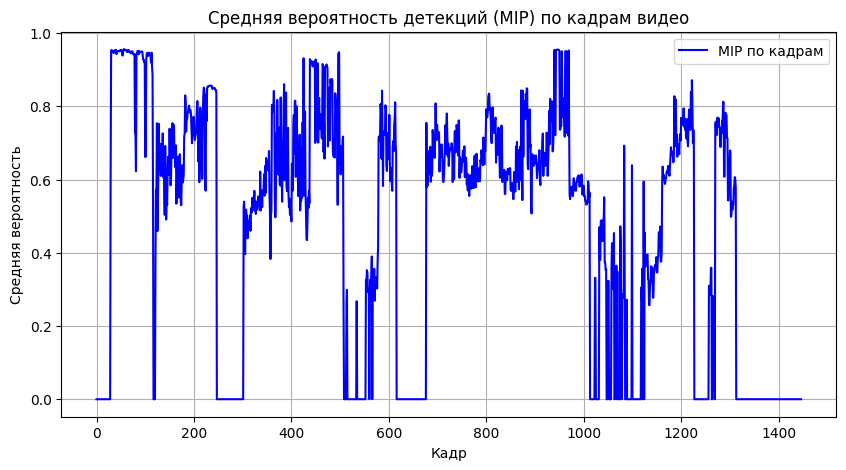

In [22]:
# Построение графика средней вероятности по кадрам
plt.figure(figsize=(10, 5))
plt.plot(mean_confidences, label="MIP по кадрам", color='blue')
plt.xlabel("Кадр")
plt.ylabel("Средняя вероятность")
plt.title("Средняя вероятность детекций (MIP) по кадрам видео")
plt.legend()
plt.grid(True)
plt.show()


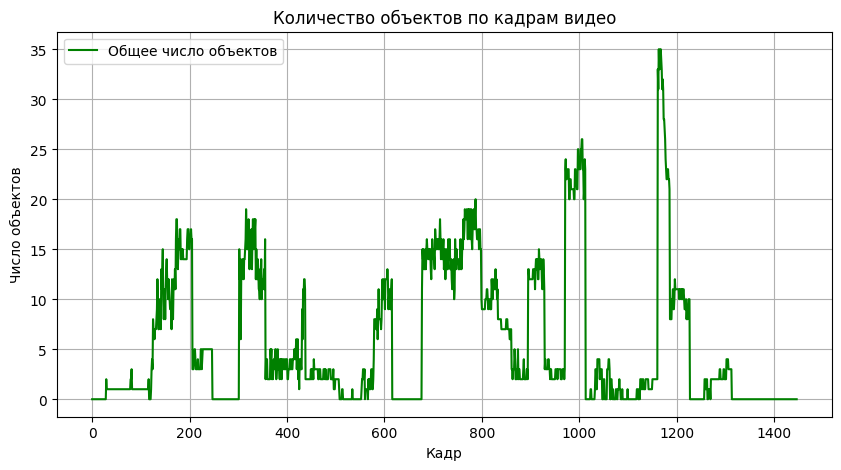

In [23]:
# Построение графика общего числа объектов по кадрам
plt.figure(figsize=(10, 5))
plt.plot(total_objects_per_frame, label="Общее число объектов", color='green')
plt.xlabel("Кадр")
plt.ylabel("Число объектов")
plt.title("Количество объектов по кадрам видео")
plt.legend()
plt.grid(True)
plt.show()

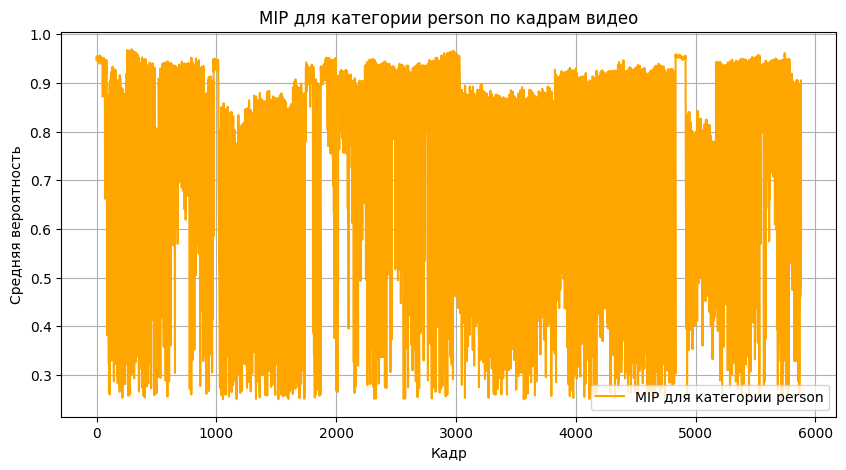

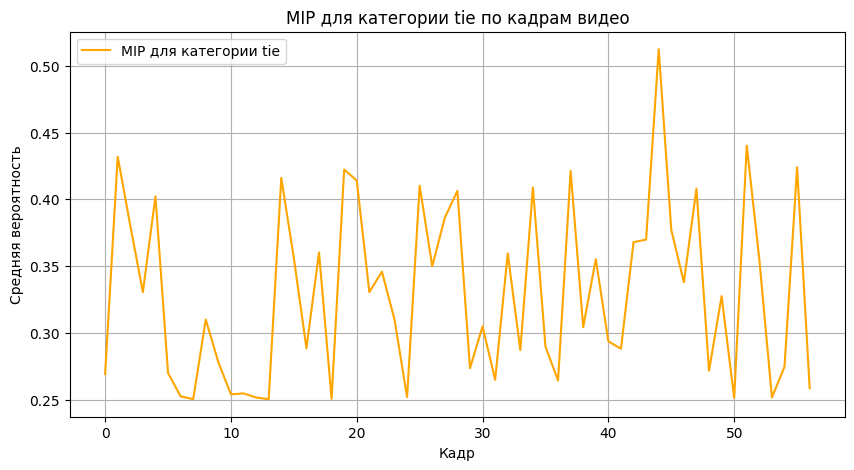

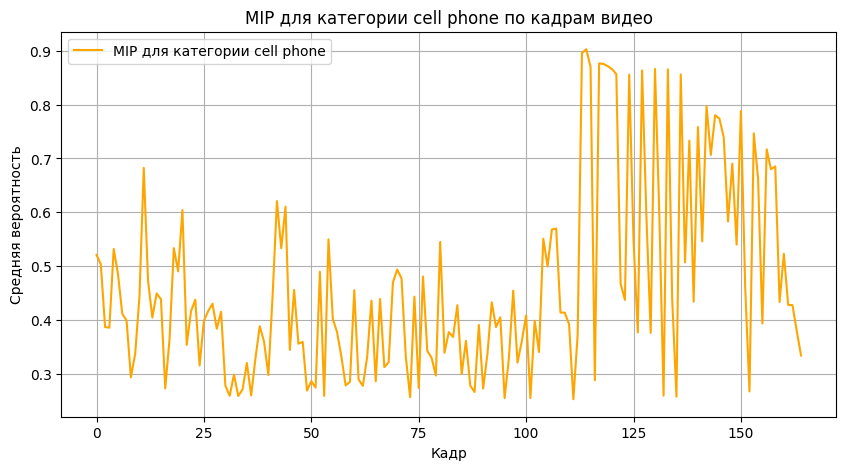

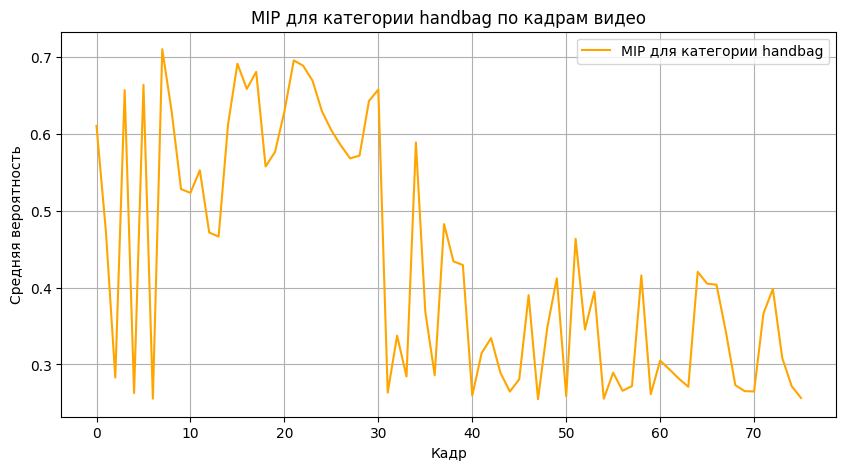

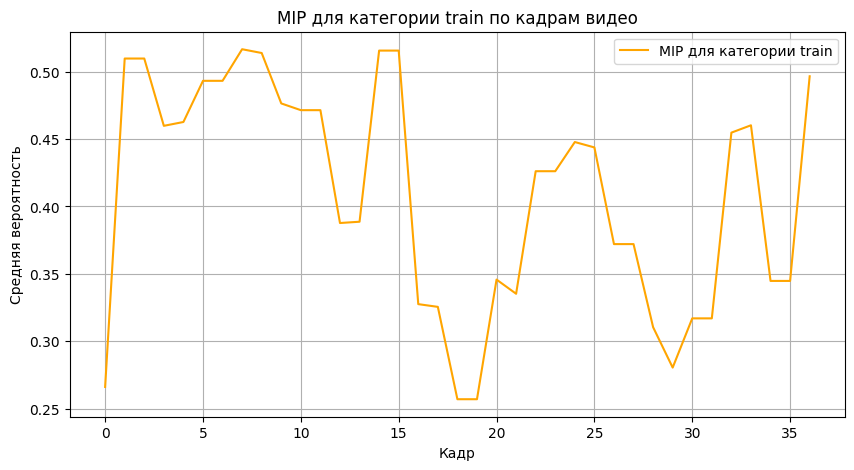

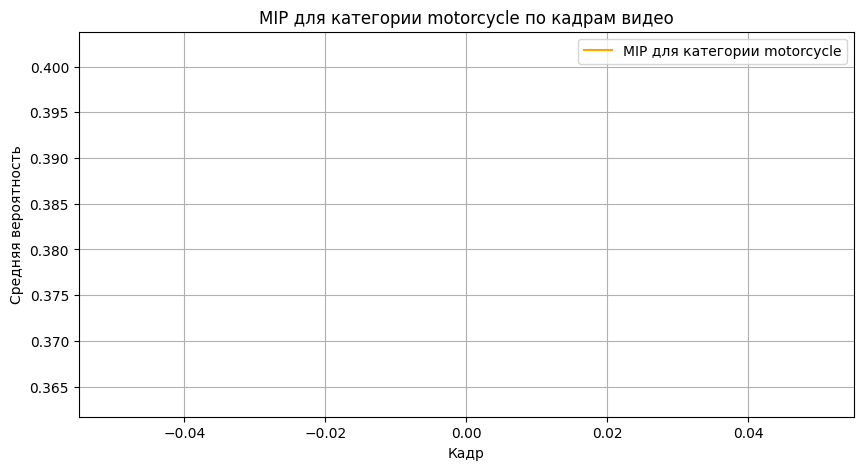

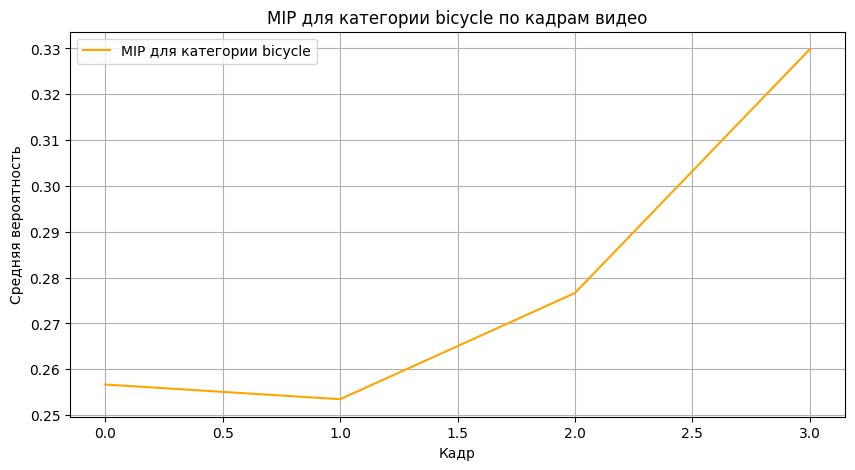

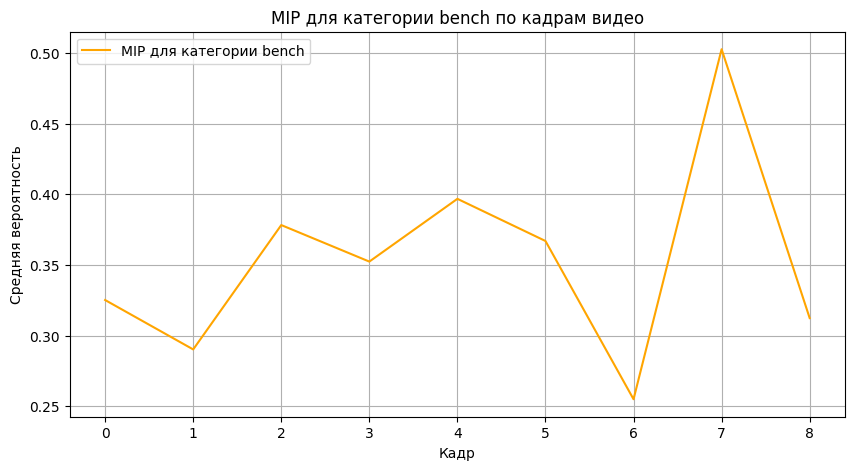

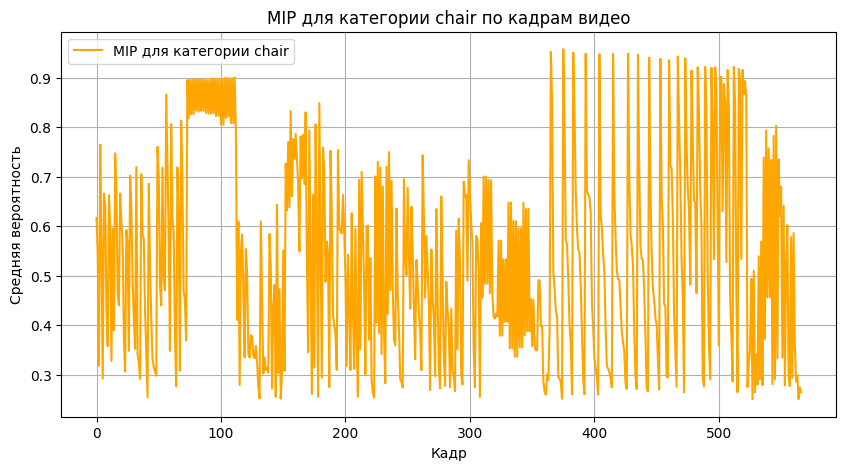

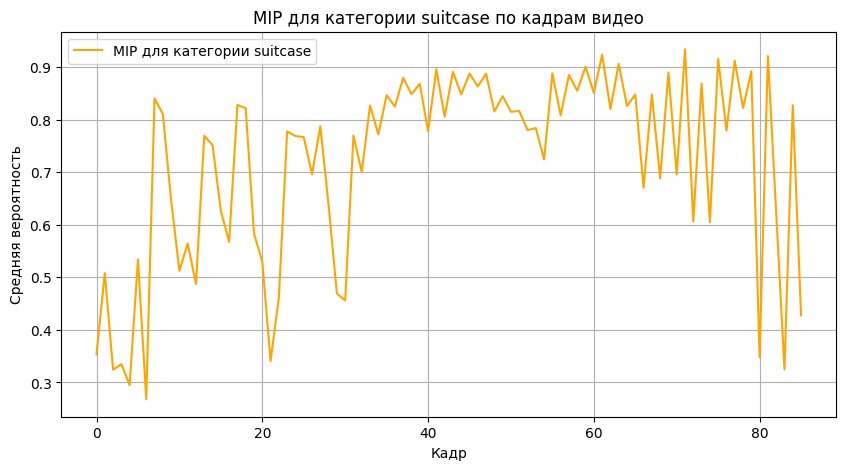

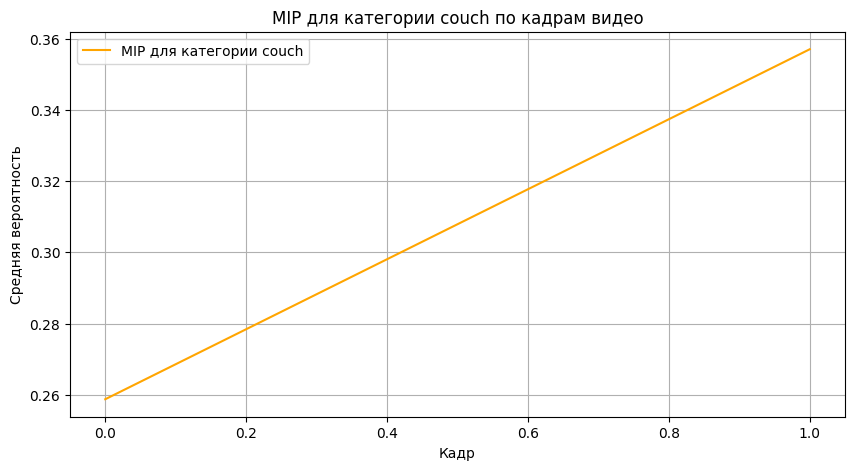

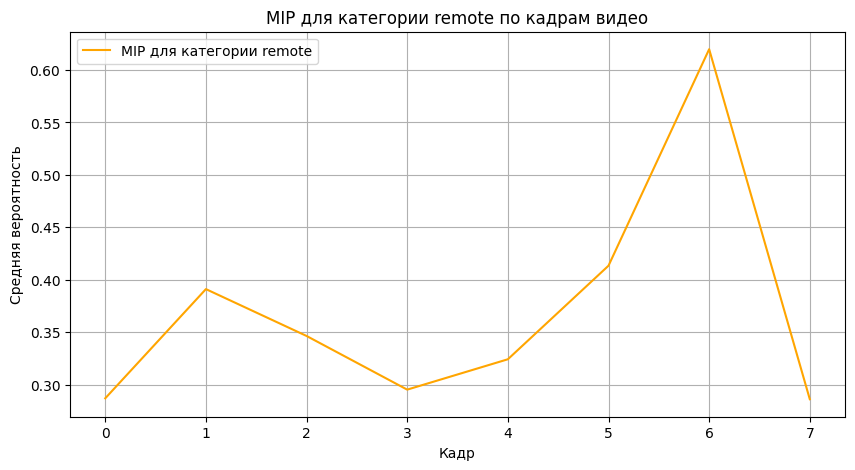

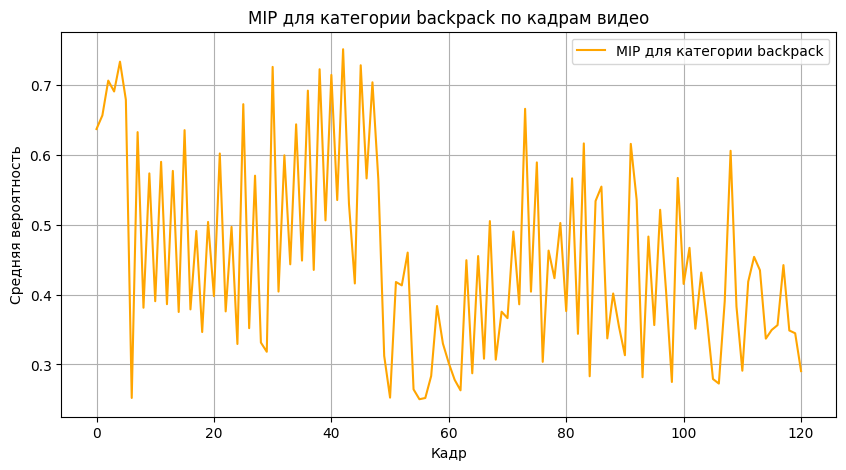

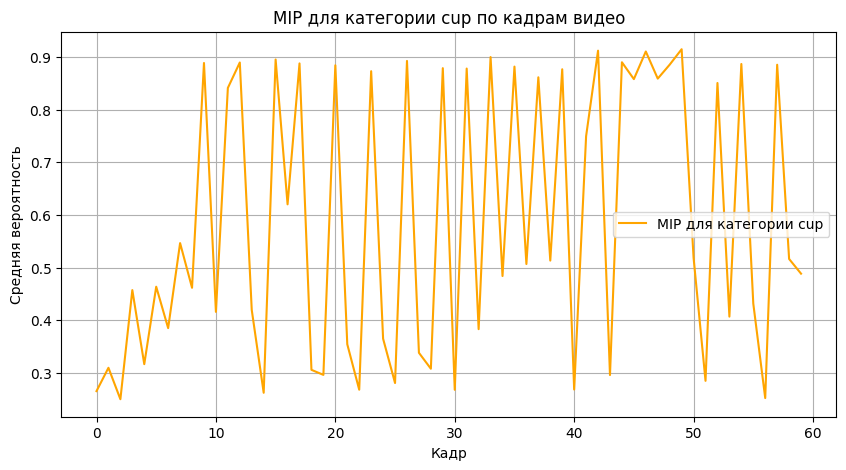

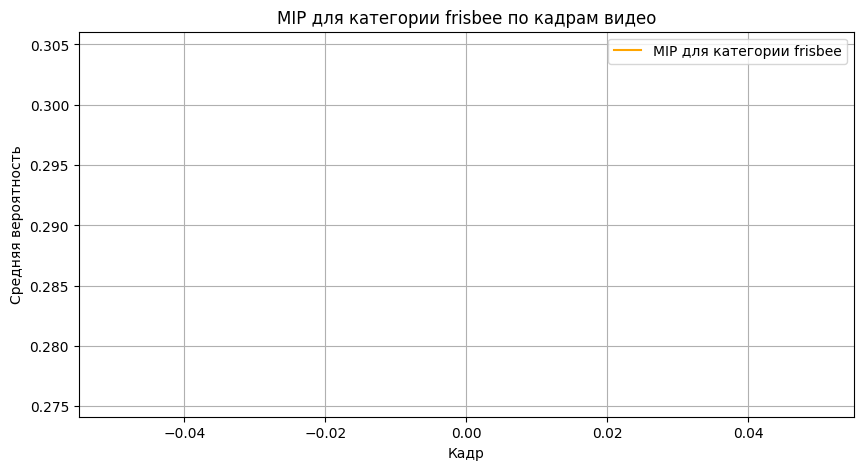

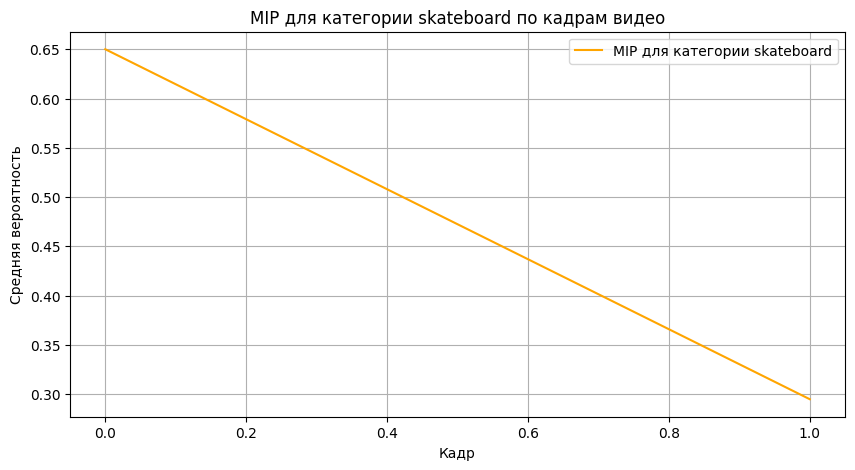

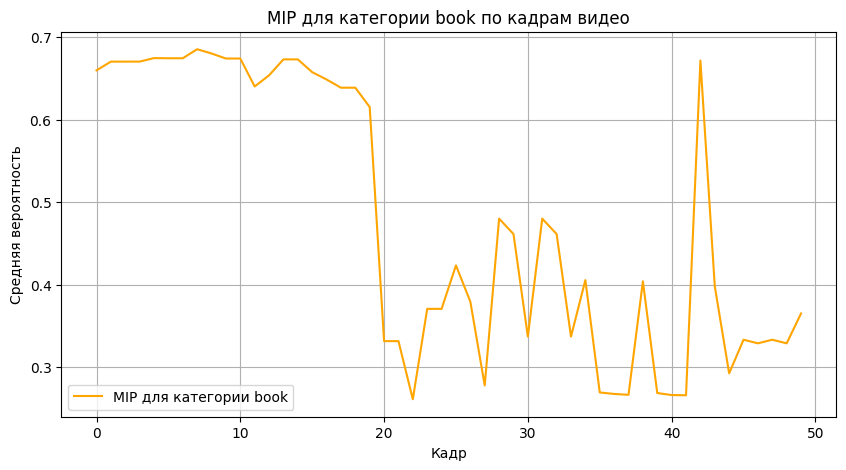

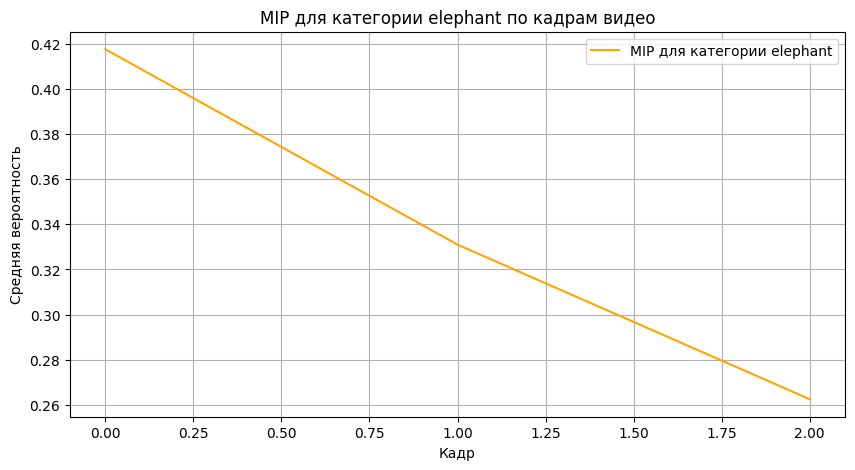

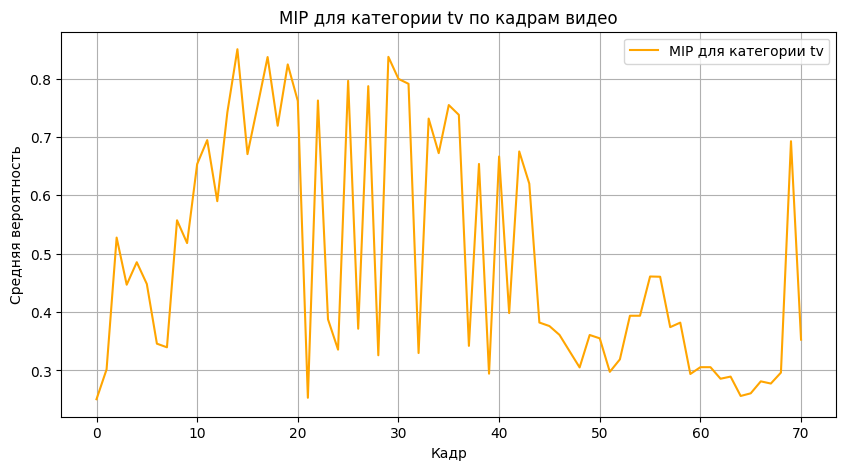

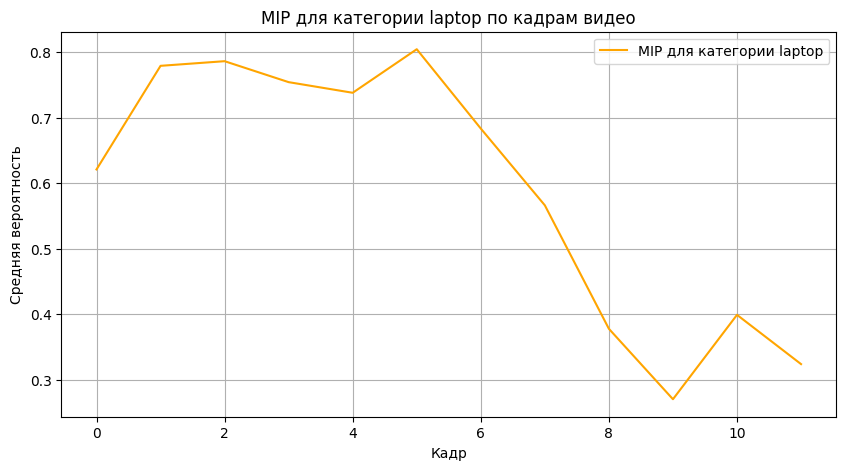

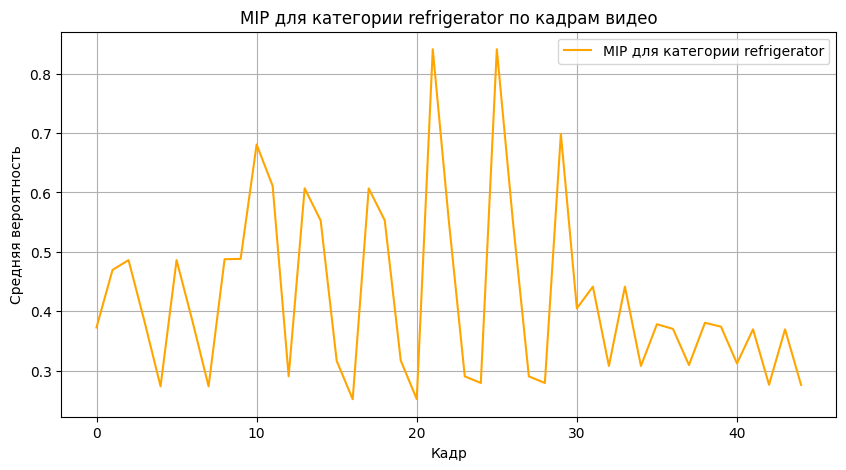

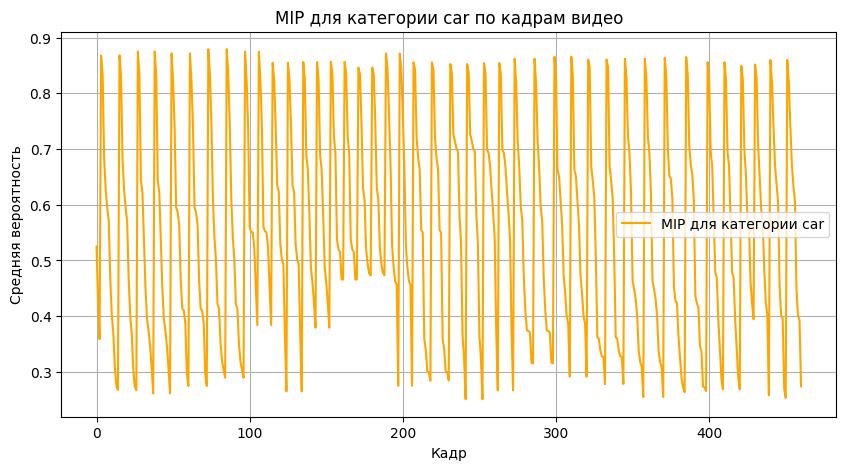

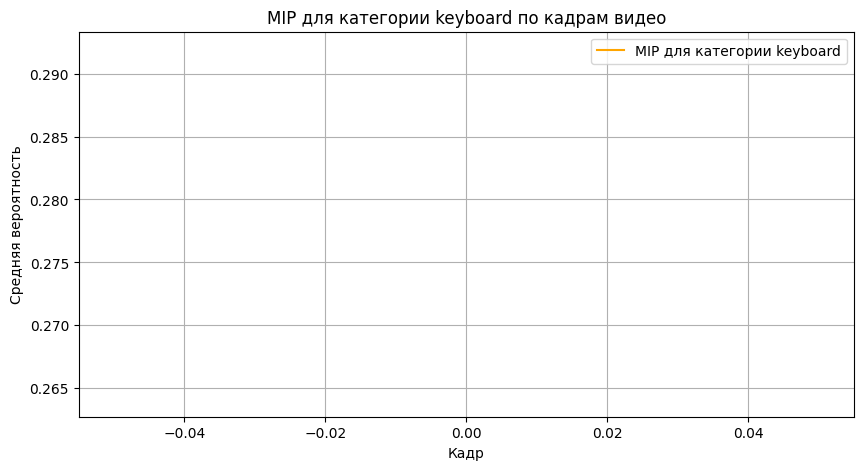

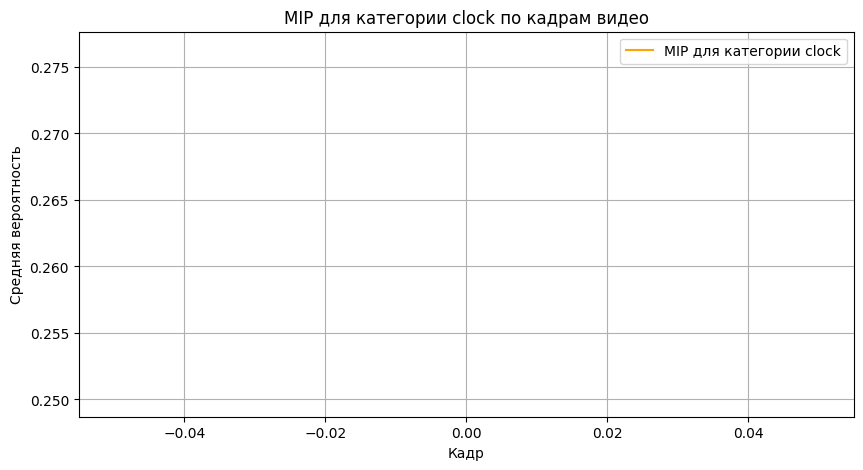

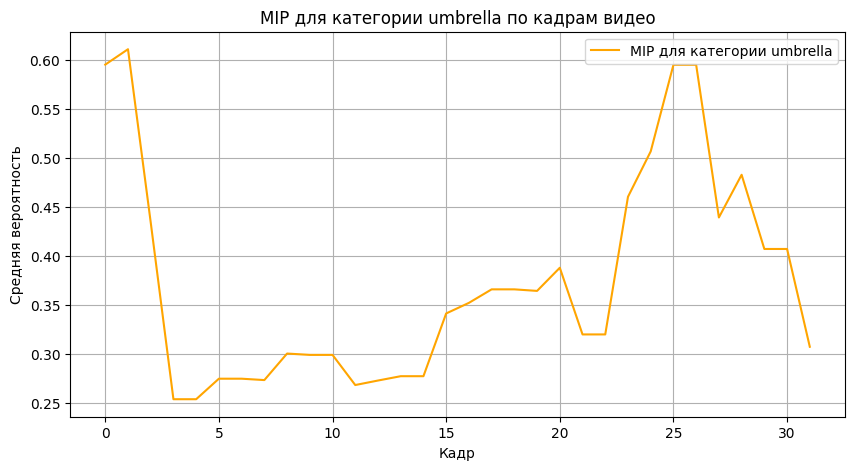

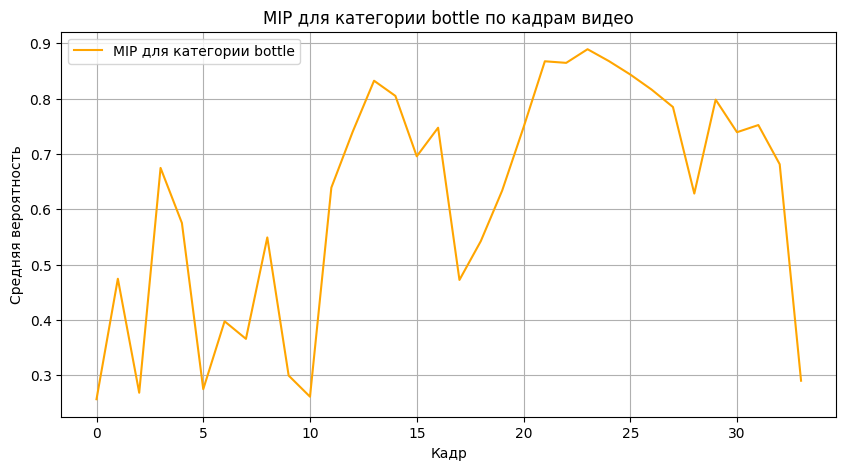

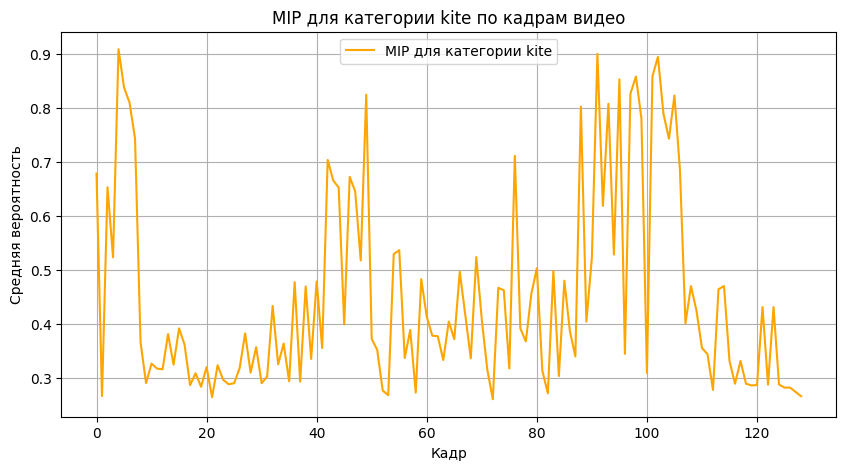

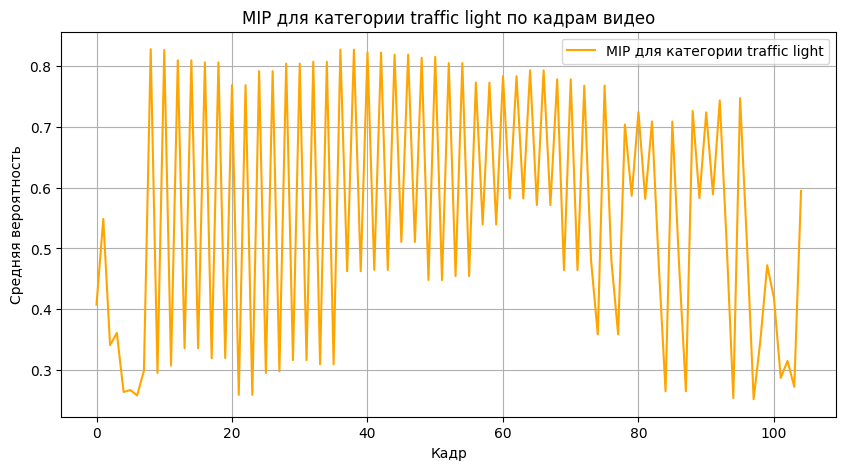

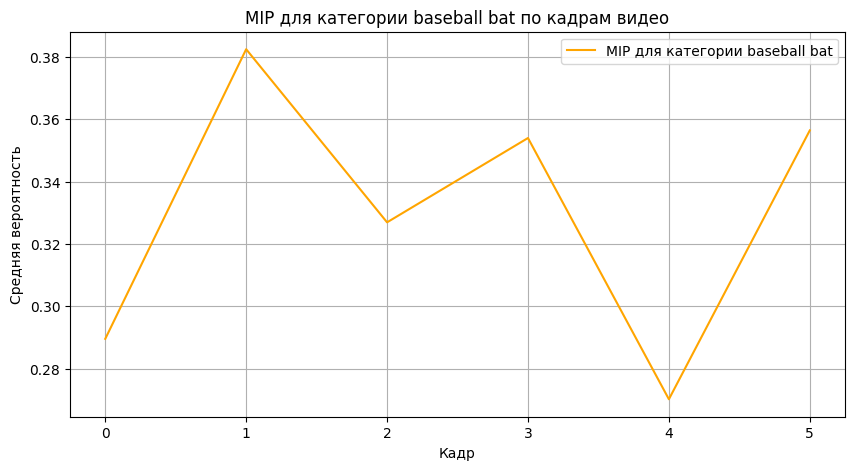

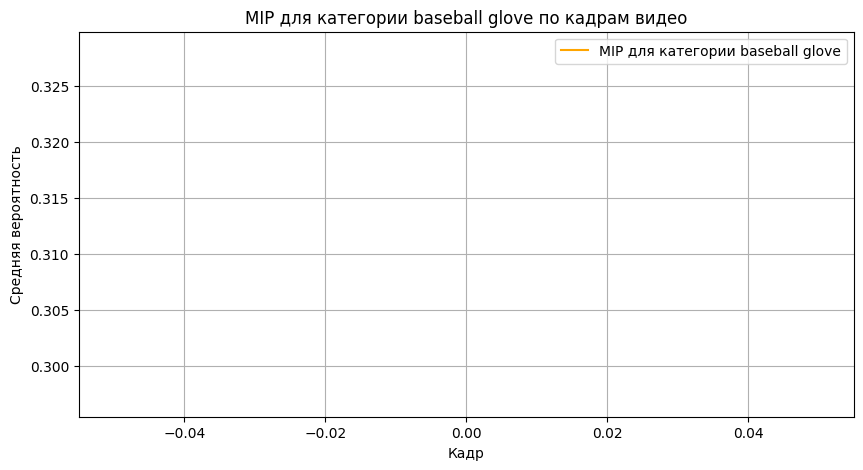

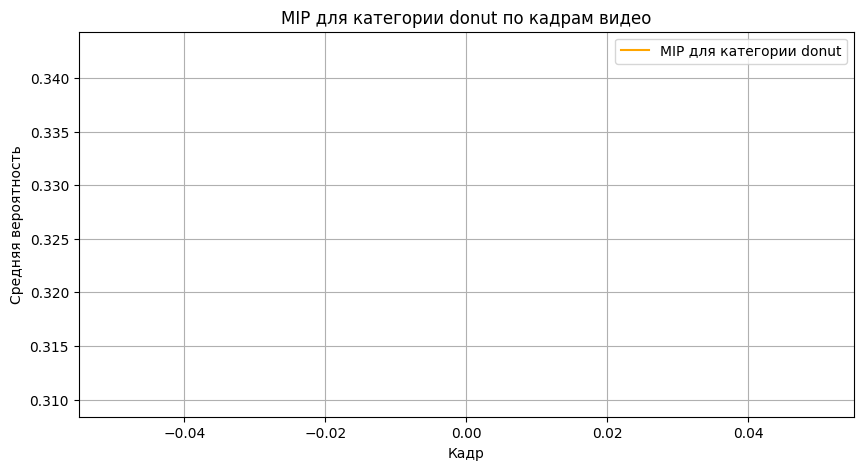

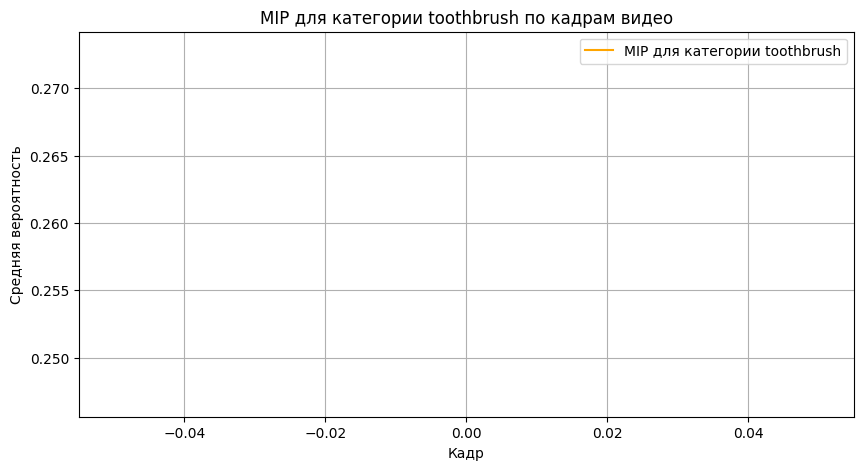

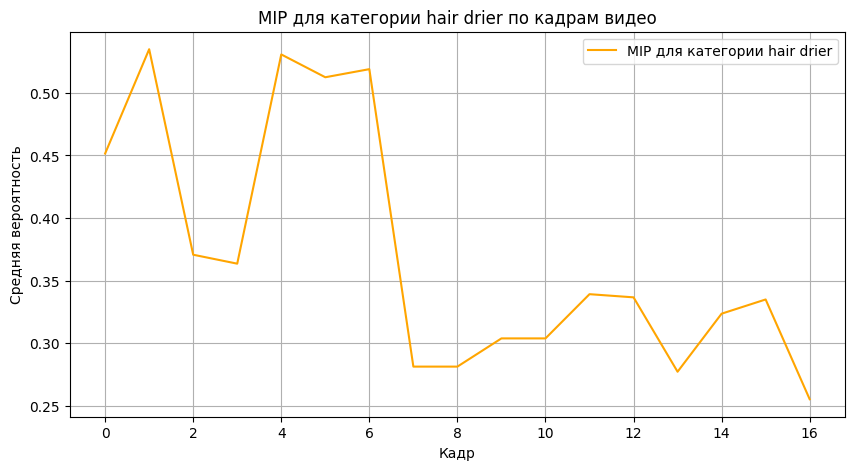

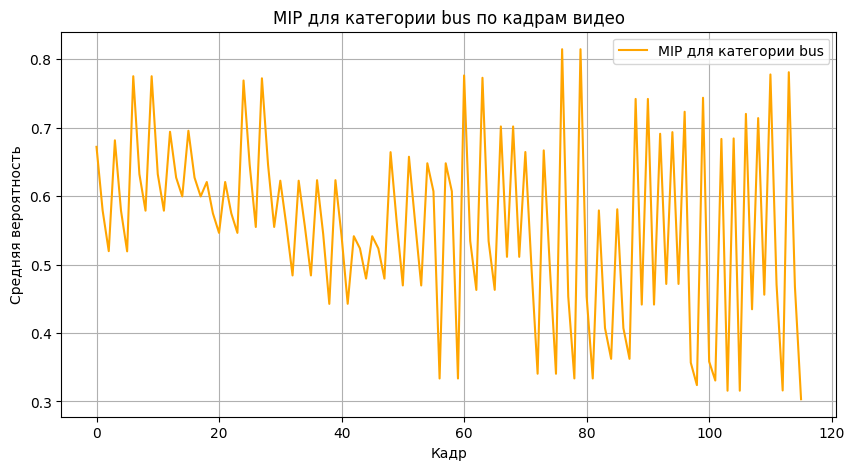

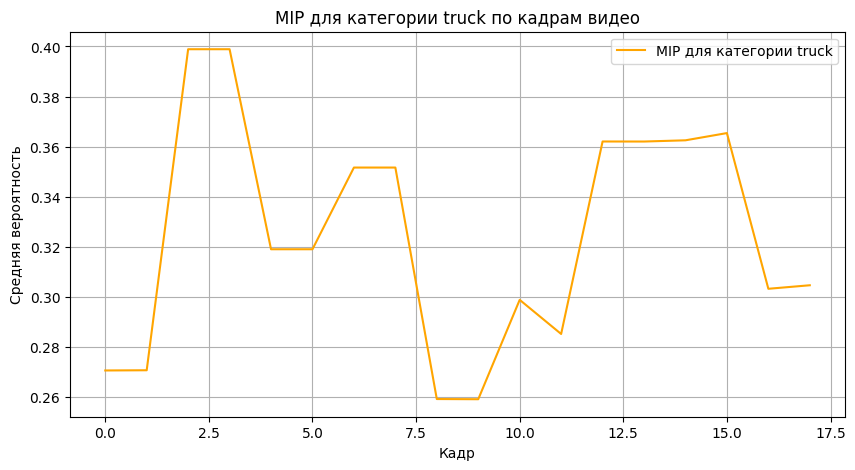

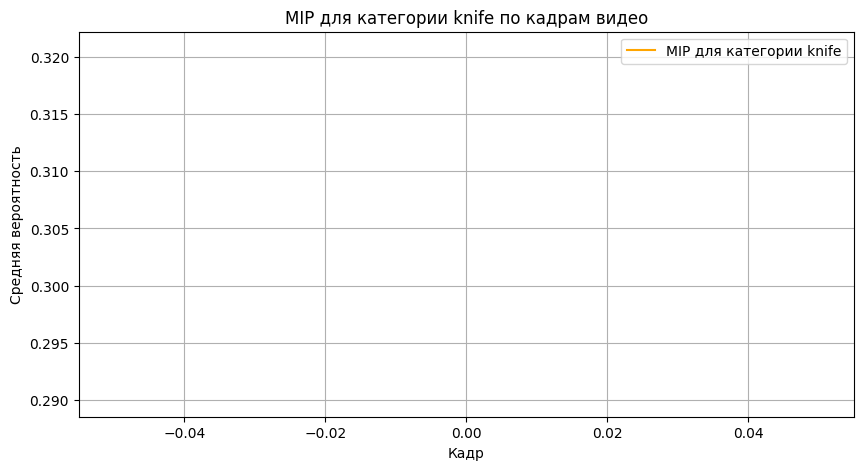

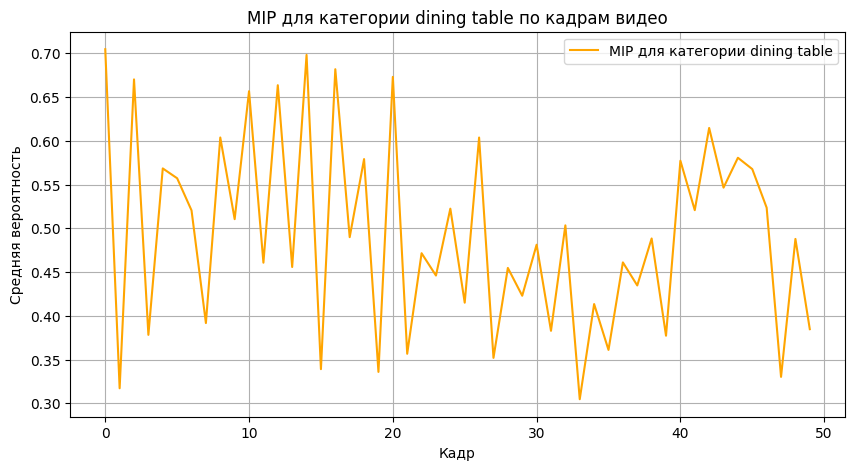

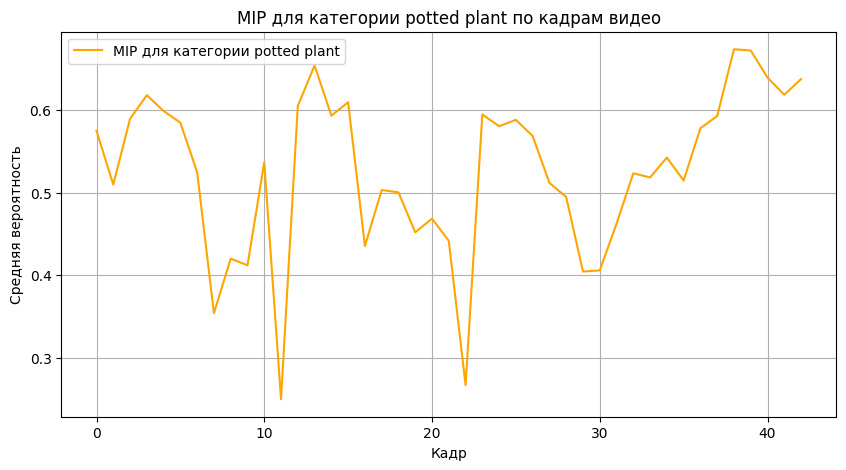

In [24]:
for cls, confs in category_confidences.items():
    category_name = category_names.get(cls, f"Unknown {cls}")
    plt.figure(figsize=(10, 5))
    plt.plot(confs, label=f"MIP для категории {category_name}", color='orange')
    plt.xlabel("Кадр")
    plt.ylabel("Средняя вероятность")
    plt.title(f"MIP для категории {category_name} по кадрам видео")
    plt.legend()
    plt.grid(True)
    plt.show()

In [28]:
category_stats = {cls: np.mean(confs) for cls, confs in category_confidences.items()}
print("Средние вероятности по категориям:")
for cls, mean_conf in category_stats.items():
    category_name = category_names.get(cls, f"Unknown {cls}")
    print(f"Категория {category_name}: {mean_conf:.2f}")

Средние вероятности по категориям:
Категория person: 0.70
Категория tie: 0.33
Категория cell phone: 0.46
Категория handbag: 0.43
Категория train: 0.41
Категория motorcycle: 0.38
Категория bicycle: 0.28
Категория bench: 0.35
Категория chair: 0.54
Категория suitcase: 0.72
Категория couch: 0.31
Категория remote: 0.37
Категория backpack: 0.45
Категория cup: 0.59
Категория frisbee: 0.29
Категория skateboard: 0.47
Категория book: 0.48
Категория elephant: 0.34
Категория tv: 0.49
Категория laptop: 0.59
Категория refrigerator: 0.42
Категория car: 0.56
Категория keyboard: 0.28
Категория clock: 0.26
Категория umbrella: 0.37
Категория bottle: 0.62
Категория kite: 0.45
Категория traffic light: 0.56
Категория baseball bat: 0.33
Категория baseball glove: 0.31
Категория donut: 0.33
Категория toothbrush: 0.26
Категория hair drier: 0.37
Категория bus: 0.56
Категория truck: 0.32
Категория knife: 0.31
Категория dining table: 0.49
Категория potted plant: 0.53
